<a href="https://colab.research.google.com/github/lin3372/400_gan/blob/main/400_gan_210_Autoencoder_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with AE (Autoencoder) applied to MNIST with Python code
* [meidum - datSci](https://towardsdatascience.com/how-to-generate-new-data-in-machine-learning-with-vae-variational-autoencoder-applied-to-mnist-ca68591acdcf)
* [github - VAE_Variational_Autoencoders](https://github.com/lbun/VAE_Variational_Autoencoders/blob/master/VAE_Variational_Autoencoders_Part1.ipynb) 

The AutoEncoders are Neural Networks used to generate new data (Unsupervised Learning). This model is used for generating new data for the dataset or also in case we want to cancel the noise from our data. The Networks is composed by multiple Neural Networks: an **encoder** and a **decoder** connected by a bottleneck that is the **latent space** as represented in the image below:

<img src="https://miro.medium.com/max/1500/1*KljH__AWgps488GDaEIH1A.png" width="500">

The **Encoder** process the data till the bottleneck (**Latent space**) reducing the size and the **Decoder** take the data and and reconstruct the data structure to give the same output as our original data. We can see the latent space as a representation of our data.

In this specific case, we are reading numbers (Mnist Dataset) images of 28x28 pixels (784 elements), we want to reduce them to 32 elements (latent space) recreating than again the image of 28x28 pixels.

The MNIST dataset is a large collection of handwritten digits that is commonly used for in image processing.

<img src="https://miro.medium.com/max/1050/1*xYSAmgivlMCdYuMGZbiq2Q.png" width="300" align="center">

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import models,layers
from tensorflow.keras import applications
import glob2 as glob
from numpy import random

To go deeper with Model CLass and API: https://keras.io/models/model/ https://keras.io/getting-started/functional-api-guide/

In [2]:
# dimensionality of the latents space 
embedding_dim = 32 

#Input layer
input_img = layers.Input(shape=(784,))  

#Encoding layer
encoded = layers.Dense(embedding_dim, activation='relu')(input_img)

#Decoding layer
decoded = layers.Dense(784,activation='sigmoid')(encoded) 

#Autoencoder --> in this API Model, we define the Input tensor and the output layer
#wraps the 2 layers of Encoder e Decoder
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()

#Encoder
encoder = models.Model(input_img,encoded)
encoder.summary()

#Decoder
encoded_input = layers.Input(shape=(embedding_dim,))
decoder_layers = autoencoder.layers[-1]  #applying the last layer
decoder = models.Model(encoded_input,decoder_layers(encoded_input))

print(input_img)
print(encoded)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32) 

In [3]:
autoencoder.compile(
    optimizer='adadelta',  #backpropagation Gradient Descent
    loss='binary_crossentropy'
)

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()   #underscore for unanimous label that we don't
                                                # want to keep im memory
#Normalization

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape((-1,784))  #to go from (60000,28,28) to new shape and -1 let
                                     #numpy to calculate the number for you
x_test = x_test.reshape((-1,784))

print(x_train.shape,x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) (10000, 784)


In [5]:
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 3/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6924 - val_lo

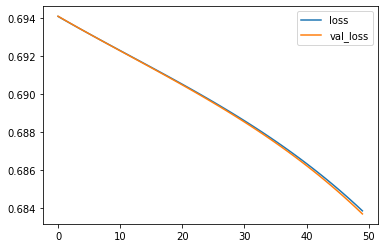

In [6]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

## Validation tell us how good is the model in generalizing

(10000, 32) (10000, 784)


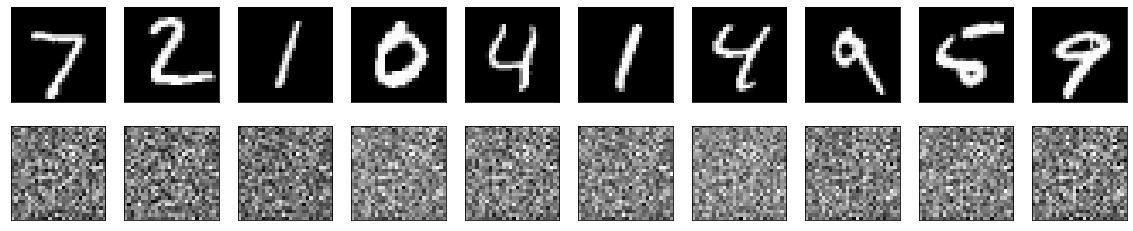

In [7]:
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs)  
print(encoded_imgs.shape,decoded_imgs.shape)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()